# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
import numpy as np
import seaborn as sns
sns.set()

def design_matrix(x, y, m):
    A = np.ones((len(x), m))
    for i in range(m-1):
        A[:, i+1] = np.multiply(A[:, i], x)
    return A

def solve(x,y,m):
    A = design_matrix(x,y,m)
    tr_AA = A.T @ A
    b = A.T @ y
    beta = np.linalg.solve(tr_AA, b)
    return beta

def pol_(x, beta):
    m = len(beta)
    pol = 0.0
    for j in range(m):
        pol += beta[j] * x**j
    return pol

def evaluate_beta(xval,beta):
    m = len(beta)
    term = 0.0
    for j in range(m):
        term += beta[j] * xval**j
    return term

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [3]:
def optimized_value(x, y, m):
    beta_ = solve(x, y, m)
    y_ = [evaluate_beta(_, beta_) for _ in x]
    n = len(x)
    pol = 0.0
    for j in range(n):
        pol += (y_[j] - y[j])**2
    t = 1/(n - m)
    return t * pol, beta_

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

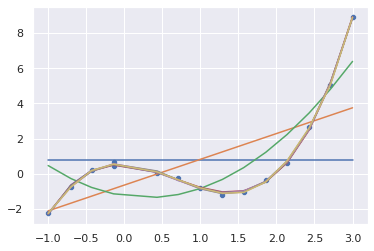

In [4]:
delta, beta = [], []
sns.scatterplot(x=x, y=y)
for m in range(1, 10,1):
    delta_, beta_ = optimized_value(x, y, m)
    delta.append(delta_)
    beta.append(beta_)
    y_ = [evaluate_beta(_, beta_) for _ in x]
    sns.lineplot(x=x, y=y_)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

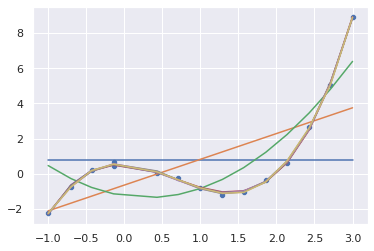

In [5]:
def design_matrix(x, y, m):
    A = np.ones((len(x), m))
    for i in range(m-1):
        A[:, i+1] = np.multiply(A[:, i], x)
    return A

def solve(x,y,m):
    A = design_matrix(x,y,m)
    Q, R = np.linalg.qr(A)
    fr = np.transpose(Q) @ y
    return np.linalg.solve(R[0:m,:], fr[0:m])

sns.scatterplot(x=x, y=y)
for m in range(1, 10,1):
    delta_, beta_ = optimized_value(x, y, m)
    delta.append(delta_)
    beta.append(beta_)
    y_= [evaluate_beta(i, beta_) for i in x]
    sns.lineplot(x=x, y=y_)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

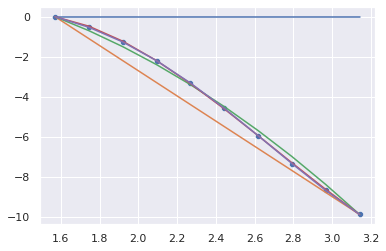

In [6]:
def Lagrange(grid, k, x):
    poly = 1
    for i in range(len(grid)):
        if i!=k:
            poly *= x - grid[i]
            poly /= grid[k] - grid[i]    
    return poly

def Lagrange_interpolator(grid, x, y):
    y_interp = np.zeros(len(x))
    for i in range(len(grid)):
        y_interp += y[i]*Lagrange(grid,i,x)
    return y_interp

def f(x):
    return (x**2) * np.cos(x)

x = np.linspace(np.pi/2,np.pi, 10)
sns.scatterplot(x=x, y=f(x))

for m in range(1,6):
    grid = np.linspace(np.pi/2,np.pi, m)
    sns.lineplot(x=x, y=Lagrange_interpolator(grid, x, f(grid)))

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

<AxesSubplot:>

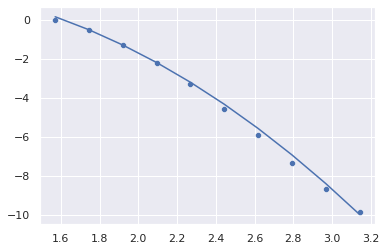

In [7]:
def Cheba(a,b,m):
    k = np.array(range(m))
    x = np.cos(2*k + 1/m)
    return (x + 1) * (b - a)/2 + a

grid = Cheba(np.pi/2, np.pi, 3)

sns.scatterplot(x=x, y=f(x))
sns.lineplot(x=x, y=Lagrange_interpolator(grid, x, f(grid)))